In [1]:
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil
from pyproj import Proj
from IPython.display import display

farm_df contains locations of wind farms. If any are missing,we can use a representative turbine from each farm

In [2]:
usa_farm_df = pd.read_csv('data/openei-wind-farm-sites.csv')
usa_farm_df.head()

,Facility Name,Facility,FacilityType,Owner,Developer,EnergyPurchaser,Place,GeneratingCapacity,NumberOfUnits,CommercialOnlineDate,WindTurbineManufacturer,FacilityStatus,Coordinates
0,251 Wind,251 Wind,NaN,NaN,NaN,NaN,"Kern County, CA",18.43 MW,194.0,1987.0,Vestas,NaN,"35.0861°, -118.3533°"
1,3-D Metals,3-D Metals,Definition:Small Scale Wind,NaN,NaN,NaN,Valley City OH,0.1 MW,1.0,2009.0,Northern Power Systems,In Service,"41.2481°, -81.8831°"
2,30 MW Iowa DG Portfolio,30 MW Iowa DG Portfolio,NaN,NaN,NaN,NaN,"Story County, IA",30 MW,10.0,2017.0,Nordex,NaN,"42.0136°, -93.5181°"
3,6th Space Warning Squadron,6th Space Warning Squadron,NaN,NaN,NaN,NaN,"Barnstable County, MA",3.36 MW,2.0,2013.0,GE Wind,NaN,"41.7525°, -70.5417°"
4,AB Tehachapi Wind Farm,AB Tehachapi,Commercial Scale Wind,Coram Energy,AB Energy,Southern California Edison Co,"Tehachapi, California",6.97 MW,31.0,1992.0,Vestas,In Service,"35.0533°, -118.2686°"


In [3]:
#filter by state (state abbrev is always at end of 'Place')
def filter_state(place,state):
    try:
        if place[-1] == ' ':
            print('bad')
        return place[-2:] == state
    except:
        print('cannot parse ',place)
        return False

farm_df = usa_farm_df[usa_farm_df['Place'].apply(lambda x: filter_state(x,'CA'))]\
    .copy().reset_index() #make this a new df

cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan
cannot parse  nan


In [4]:
#extract latitude and longitude as floats
def parse_coords(in_s):
    try:
        s_list = str(in_s).split(',')
        return  [float(s[:-1]) for s in s_list]
    except:
        print('cannot parse ',in_s)
        return [np.nan,np.nan]
farm_df['latitude'], farm_df['longitude'] = list(zip(*farm_df['Coordinates'].apply(parse_coords)))

In [5]:
farm_df.head()

,index,Facility Name,Facility,FacilityType,Owner,Developer,EnergyPurchaser,Place,GeneratingCapacity,NumberOfUnits,CommercialOnlineDate,WindTurbineManufacturer,FacilityStatus,Coordinates,latitude,longitude
0,0,251 Wind,251 Wind,NaN,NaN,NaN,NaN,"Kern County, CA",18.43 MW,194.0,1987.0,Vestas,NaN,"35.0861°, -118.3533°",35.0861,-118.3533
1,19,Aero Turbine,Aero Turbine,Commercial Scale Wind,AeroTurbine Energy Company,NaN,NaN,Riverside County CA,5 MW,39.0,1989.0,NaN,In Service,"33.7436°, -115.9925°",33.7436,-115.9925
2,30,Alite Wind Farm,Alite Wind Farm,Commercial Scale Wind,Terra-Gen Power LLC,Allco/Oak Creek Energy,California Portland Cement,Mojave CA,24 MW,8.0,2008.0,Vestas,In Service,"35.0406°, -118.2994°",35.0406,-118.2994
3,32,Alta I,Alta I,Commercial Scale Wind,Terra-Gen Power LLC,Terra-Gen Power LLC,Southern California Edison Co,Tehachapi Pass CA,150 MW,100.0,2010.0,GE Energy,In Service,"35.0192°, -118.3031°",35.0192,-118.3031
4,33,Alta II (Vestas),Alta II (Vestas),Commercial Scale Wind,Terra-Gen Power LLC,Terra-Gen Power LLC,Southern California Edison Co,Tehachapi Pass CA,150 MW,50.0,2010.0,Vestas,In Service,"35.0192°, -118.3031°",35.0192,-118.3031


In [6]:
#might want to filter by online date depending on age of other data
print(farm_df['CommercialOnlineDate'].max())

2018.0


In [135]:
gen_df

,Year,Company Name,EIA\nPlant ID,CEC\nPlant ID,Plant Name,State,Capacity (MW),Gross MWh,Net MWh
0,2019.0,Alta Wind VIII LLC,57835,W0393,"Alta Wind VIII, LLC",CA,150.0,237116,237116
1,2019.0,BP Wind Energy North America,50553,W0391,"Edom Hills Project 1, LLC",CA,20.0,28500,28500
2,2019.0,CalWind Resources Inc,10191,W0284,Wind Resource I (Calwind Wind Resource I),CA,8.7,14038,14038
3,2019.0,CalWind Resources Inc,54909,W0320,Wind Resource II (Calwind),CA,20.0,47619,47619
4,2019.0,Coram California Development LP,57962,W0408,"Coram California Development, LP",CA,102.0,247038,247038
...,...,...,...,...,...,...,...,...,...
111,2019.0,Terra-Gen Operating Company,10586,W0407,Cameron Ridge,CA,59.7,153820,153820
112,2019.0,Terra-Gen Operating Company,57834,W0415,Pinyon Pines Winds I,CA,168.0,275334,275334
113,2019.0,Terra-Gen Operating Company,57837,W0416,Pinyon Pines Winds II,CA,132.0,213748,213748
114,2019.0,Windpower Partners 1993 LP,50276,W0318,"Wintec Energy, Ltd.",CA,2.2,71,71


In [5]:
#load power generation data for years where enough is available
#gen_years = [14,15,16,17,18,19]
gen_years = [18,19]
gen_df = pd.concat(
    [pd.read_csv('data/ca-power-gen-{0:d}.csv'.format(yr), thousands=',') for yr in gen_years],
    axis=0)
gen18_df= gen_df[gen_df.Year == 2018]
gen_df = gen_df[gen_df.Year == 2019]

gen_df.head()

,Year,Company Name,EIA\nPlant ID,CEC\nPlant ID,Plant Name,State,Capacity (MW),Gross MWh,Net MWh
0,2019.0,Alta Wind VIII LLC,57835,W0393,"Alta Wind VIII, LLC",CA,150.0,237116,237116
1,2019.0,BP Wind Energy North America,50553,W0391,"Edom Hills Project 1, LLC",CA,20.0,28500,28500
2,2019.0,CalWind Resources Inc,10191,W0284,Wind Resource I (Calwind Wind Resource I),CA,8.7,14038,14038
3,2019.0,CalWind Resources Inc,54909,W0320,Wind Resource II (Calwind),CA,20.0,47619,47619
4,2019.0,Coram California Development LP,57962,W0408,"Coram California Development, LP",CA,102.0,247038,247038


In [6]:
#turbine data (ostensibly for 2020)
usa_turb_df = pd.read_csv('data/uswtdbCSV/uswtdb_v3_0_1_20200514.csv')
ca_turb_df = usa_turb_df[usa_turb_df.t_state == 'CA']
#points = [Point(xy) for xy in zip(ca_turbines['xlong'],ca_turbines['ylat'])]

In [294]:
ca_turb_df.head().columns

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 'eia_id', 't_state',
       't_county', 't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu',
       't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_conf_atr',
       't_conf_loc', 't_img_date', 't_img_srce', 'xlong', 'ylat'],
      dtype='object')

## filter from string matching list (not used)

In [8]:
farm_names, gen_names, turb_names = [
    df[fname].unique() for (df,fname) in zip([farm_df,gen_df,ca_turb_df],['Facility Name','Plant Name','p_name'])
]
print(len(farm_names),len(gen_names),len(turb_names))

166 117 135


In [9]:
def match_str(s,s_match):
    if s_match in s:
        return True
    #print(s_match[-1])
    if len(s) >= len(s_match[:-1]) and s_match[-1] == ' ': #check end, without space
        #if s == 'Alta I' and s_match == 'Alta I ':
            #print('|' + s[-len(s_match[:-1]):] + '|')
            #print('|' + s_match[:-1] + '|')
        if s[-len(s_match[:-1]):] == s_match[:-1]:
            return True
    return False
def vec_str_in(s_arr,s_match):
    return [match_str(str(s),s_match) for s in s_arr]
def vec_all_str_in(s_arr,s_match_list):
    return [np.all([match_str(str(s),s_match) for s_match in s_match_list]) for s in s_arr]

In [142]:
rn_list = 'I,II,III,IV,V,VI,VII,VIII,IX,X'.split(',')
def flatten(list_of_lists):
    return [y for x in list_of_lists for y in x]
def make_rn_names(root,n):
    return [[root, ' ' + rn + ' '] for rn in rn_list[:n]]
names = [
    ['251'],
    *[['Alta ' + rn + ' '] for rn in rn_list],
    ['Edom'],
    ['Coram','Energy'],
    ['Wintec' , ' '],['Wintec II '], #how to distinguish I, II?
    ['Windstar'],
    *make_rn_names('Pinyon',2),
    ['Mojave'],
    ['Ocotillo'], #we have octotillo, octotillo expansion listed separately in farm_df
    ['Manzana'],
    ['High'],
    ['North Sky'],
    ['Golden Hills'],
    ['Dutch'],
    ['Voyager'],
    *make_rn_names('Shiloh',3),
    *flatten(make_rn_names(root,4) for root in 'Montezuma,Rising Tree,Mountain View,Windland,Altech'.split(','))
]

def check_names(df_names,names):
    return [np.count_nonzero(vec_all_str_in(df_names,name)) for name in names]
#make sure 'names' specifies unique names in each df (should print list of 1s)
gen_check = check_names(gen_df['Plant Name'].unique(),names)
gen18_check = check_names(gen18_df['Plant Name'].unique(),names)
farm_check = check_names(farm_df['Facility Name'].unique(),names)
turb_check = check_names(ca_turb_df['p_name'].unique(),names)

def flag_colors(val):
    if type(val) == list:
        _ = len(val)
        color = 'black'
    else:
        try:
            color = {1 : 'black', 0 : 'red'}[val]
        except:
            color = 'orange'
    return 'color: %s' % color
display(
    pd.DataFrame({'name' : names,'gen' : gen_check,'gen18' : gen18_check, 'farm' : farm_check, 'turb' : turb_check})\
    .style.applymap(flag_colors)
)
# for check in (gen_check,farm_check,turb_check):
#     print(check)
valid_names = [name for name,gc,fc in zip(names,gen_check,farm_check) if (gc==1 and fc==1)]
print(len(valid_names),'remaining')

,name,gen,gen18,farm,turb
0,['251'],1,1,1,1
1,['Alta I '],1,1,1,1
2,['Alta II '],1,1,1,1
3,['Alta III '],1,1,1,1
4,['Alta IV '],1,1,1,1
5,['Alta V '],1,1,1,1
6,['Alta VI '],0,0,1,1
7,['Alta VII '],0,0,0,0
8,['Alta VIII '],0,0,1,1
9,['Alta IX '],0,0,0,0


20 remaining


In [183]:
check_names(gen_df['Plant Name'].unique(),valid_names)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [146]:
#filter out plants of interest
select_gen_df, select_gen18_df, select_farm_df, select_turb_df = \
[pd.concat([df[vec_all_str_in(df[fname],name)] for name in valid_names],axis=0).reset_index()
                 for df, fname in zip([gen_df,gen18_df,farm_df,ca_turb_df],['Plant Name','Plant Name','Facility Name','p_name'])]

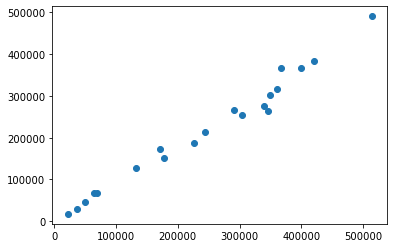

In [147]:
plt.scatter(select_gen18_df['Gross MWh'],select_gen_df['Gross MWh'])

## filter from manual name matching list

In [7]:
match_df = pd.read_csv('data/name_match_060220.csv')
match_df = match_df[['GEN','FARM','TURB']]
match_df = match_df[match_df != '2 entries'] #count these as invalid
match_df = match_df.dropna().reset_index().drop('index',axis=1)
print(len(match_df))
match_df.tail()


51


,GEN,FARM,TURB
46,Tule Wind,Tule,Tule
47,Vasco Wind Energy Center,Vasco (repower),Vasco (repower)
48,"WAGNER WIND, LLC",Wagner,Wagner
49,Wal-Mart Red Bluff,Walmart Red Bluff,Walmart Red Bluff
50,"Windstar Energy, LLC",Windstar,Windstar


In [40]:
fname = 'Plant Name'
df = gen_df
print(np.all([np.count_nonzero(df[fname] == name) == 1 for name in match_df['GEN']]))
fname = 'Plant Name'
df = gen18_df
print(np.all([np.count_nonzero(df[fname] == name) == 1 for name in match_df['GEN']]))
fname = 'Facility Name'
df = farm_df
print(np.all([np.count_nonzero(df[fname] == name) == 1 for name in match_df['FARM']]))
df = ca_turb_df
fname = 'p_name'
np.all([np.count_nonzero(df[fname].unique() == name) == 1 for name in match_df['TURB']])

True
True
True


True

In [67]:
select_gen_df, select_farm_df, select_turb_df = \
[pd.concat([df[df[fname] == name] for name in valid_names],axis=0).reset_index()
                 for df, fname, valid_names in zip(
                     [gen_df,farm_df,ca_turb_df],
                     ['Plant Name','Facility Name','p_name'],
                     [match_df[c] for c in ['GEN','FARM','TURB']]
                 )
]


def format_gen_cap(s):
    return float(s[:-3])
allowed_diff = 5
diff = select_gen_df['Capacity (MW)']- select_farm_df['GeneratingCapacity'].apply(format_gen_cap)
within_diff = np.abs(diff) < 5
select_gen_df = select_gen_df[within_diff]
select_farm_df = select_farm_df[within_diff]
select_turb_df = pd.concat([
    select_turb_df[select_turb_df.p_name == name]
    for name,w in zip(match_df['TURB'],within_diff) if w],axis=0)

In [66]:
select_turb_df[select_turb_df.p_name == 'Mountain View Power Partners I & II']['t_rsa']

1480    1590.43
1481    1590.43
1482    1590.43
1483    1590.43
1484    1590.43
         ...   
1691    1590.43
1692    1590.43
1693    1590.43
1694    1590.43
1695    1590.43
Name: t_rsa, Length: 216, dtype: float64

In [57]:
len(match_df['FARM'].unique())

51

In [51]:
len(pd.concat([
    select_turb_df[select_turb_df.p_name == name]
    for name,w in zip(match_df['TURB'],within_diff) if w],axis=0))

2209

In [39]:
[len(df) for df in (select_gen_df,select_farm_df,select_turb_df['p_name'].unique())]

[43, 43, 42]

In [326]:
np.count_nonzero(df[fname] == match_df['GEN'][0])

1

generating capacity must matcH

In [85]:
select_turb_df.groupby('p_name').agg({'p_cap' : ['mean','std']})

p_cap          
                                                  mean       std
p_name                                                          
251 Wind                                     16.322187  0.752810
Alta I                                      150.000000  0.000000
Alta II                                     150.000000  0.000000
Alta III                                    150.000000  0.000000
Alta IV                                     102.000000  0.000000
Alta V                                      168.000000  0.000000
Alta VIII (partial)                         129.000000  0.000000
Alta X                                      136.800000  0.000000
Alta XI                                      89.650000  0.000000
Anheuser-Busch Fairfield                      1.675000  0.247487
Buena Vista                                  38.000000  0.000000
Cemex Black Mountain Quarry                   3.000000  0.000000
Cemex Madison                                 1.500000       NaN
Cemex River Plant                             3.200000  0.000000
City of Soledad Water Reclamation Facility    1.850000       NaN
Coram Energy LLC                              9.000000  0.000000
Difwind 1                                     7.340000  0.000000
Difwind 2                                     3.020000  0.000000
Difwind 5                                    11.770000  0.000000
Garnet Wind Project                           6.500000  0.000000
Golden Acorn Casino                           1.850000       NaN
Golden Hills                                 85.812245  0.614286
Golden Hills North                           46.000000  0.000000
Hatchett Ridge                              101.200000  0.000000
High Winds                                  162.000000  0.000000
Inland Empire Utility Agency                  1.000000       NaN
Kumeyaay Phase I                             50.000000  0.000000
Manzana Winds                               189.000000  0.000000
Mesa Wind Farm                               30.000000  0.000000
Montezuma Winds II                           78.200000  0.000000
Mountain View Power Partners I & II          66.600000  0.000000
Mountain View Power Partners III             22.440000  0.000000
Mustang Hills                                18.000000  0.000000
Nestle Waters                                 3.000000  0.000000
Oak Creek Energy Systems                      5.296667  1.960000
Pacific Wind                                143.500000  0.000000
Pinyon Pines II                             132.000000  0.000000
Robertsons Ready Mix                          3.200000  0.000000
Safeway Tracy                                 2.000000  0.000000
San Gorgonio Westwinds II LLC                43.400000  0.000000
Scheid Vineyards                              1.850000       NaN
Solano Phase 3                              127.800000  0.000000
Solano Phase IIA                             24.000000  0.000000
Superior Farms                                1.000000       NaN
Taylor Farms                                  1.850000       NaN
Tule                                        131.100000  0.000000
Vasco (repower)                              78.200000  0.000000
Wagner                                        6.000000  0.000000
Walmart Red Bluff                             1.500000       NaN
Windstar                                    120.000000  0.000000

In [76]:
pd.concat([
    select_gen_df[['Plant Name']],select_farm_df[['Facility Name']],
           select_gen_df['Capacity (MW)'],select_farm_df[['GeneratingCapacity']]
],axis=1)

,Plant Name,Facility Name,Capacity (MW),GeneratingCapacity
0,Alta I Wind Energy Center,Alta I,150.0,150 MW
1,Alta II Wind Energy Center,Alta II (Vestas),150.0,150 MW
2,Alta III Wind Energy Center,Alta III,150.0,150 MW
3,Alta IV Wind Energy Center,Alta IV,102.0,102 MW
4,Alta V Wind Energy Center,Alta V,168.0,168 MW
5,"Alta Wind VIII, LLC",Alta VIII (partial),150.0,129 MW
6,Alta X Wind Energy Center,Alta X,136.8,136.8 MW
7,Alta XI Wind Energy Center,Alta XI,89.7,69.7 MW
8,Anheuser-Busch,Anheuser-Busch Fairfield,1.5,1.5 MW
9,Buena Vista Energy LLC,Buena Vista Wind Farm Repower,38.0,38 MW


In [319]:
len(select_farm_df)

51

In [10]:
def MWh_per_year_to_MW(x):
    return 1.142e-4*x
select_gen_df['mean MW'] = pd.to_numeric(select_gen_df['Gross MWh']).apply(MWh_per_year_to_MW)
select_gen_df['cap_frac'] = select_gen_df['mean MW']/select_gen_df['Capacity (MW)']
select_gen_df[['Plant Name','Capacity (MW)','Gross MWh','mean MW','cap_frac']].head()

,Plant Name,Capacity (MW),Gross MWh,mean MW,cap_frac
0,Alta I Wind Energy Center,150.0,366369,41.839340,0.278929
1,Alta II Wind Energy Center,150.0,301923,34.479607,0.229864
2,Alta III Wind Energy Center,150.0,316458,36.139504,0.240930
3,Alta IV Wind Energy Center,102.0,152311,17.393916,0.170529
4,Alta V Wind Energy Center,168.0,253993,29.006001,0.172655


In [12]:
test = select_turb_df.groupby('p_name').count()['index']

In [13]:
test_sorted = pd.concat([test[test.index == name] for name in match_df['TURB']],axis=0).reset_index()
test_sorted

,p_name,index
0,Alta I,100
1,Alta II,41
2,Alta III,50
3,Alta IV,37
4,Alta V,56
5,Alta VIII (partial),58
6,Alta X,48
7,Alta XI,49
8,Anheuser-Busch Fairfield,2
9,Buena Vista,37


In [20]:
#get number of turbines for each plant
#select_df['n_turbines'] = [np.count_nonzero(vec_all_str_in(ca_turb_df['p_name'].to_numpy(),name)) for name in names]
#select_df['n_turbines'] = np.array([
#    farm_df[vec_all_str_in(farm_df['Facility Name'],name)]['NumberOfUnits'] for name in names]).astype(np.float)
#get lat / lon for each plant
# take = pd.concat([farm_df[['latitude','longitude']][vec_all_str_in(farm_df['Facility Name'].to_numpy(),name)] for name in names],
#                                  axis = 0).reset_index()
# select_df['latitude'] = take['latitude']
# select_df['longitude'] = take['longitude']

select_df = pd.concat([
    select_gen_df, select_farm_df[['NumberOfUnits','latitude','longitude']]
],axis=1)
select_df['n_turbs'] = test_sorted['index']
n_units = np.maximum(select_df['n_turbs'],select_df['NumberOfUnits'])
select_df['per_turb_power'] = select_df['mean MW']/n_units
select_df['per_turb_capacity'] = select_df['Capacity (MW)']/n_units
select_df['per_turb_cap_frac'] = select_df['per_turb_power']/select_df['per_turb_capacity']


In [ ]:
(1/2)*(air density)*(area swept by rotor)*(v^3)

In [90]:
select_df

,index,Year,Company Name,EIA\nPlant ID,CEC\nPlant ID,Plant Name,State,Capacity (MW),Gross MWh,Net MWh,mean MW,cap_frac,NumberOfUnits,latitude,longitude,n_turbs,per_turb_power,per_turb_capacity,per_turb_cap_frac
0,106,2019.0,Terra-Gen Operating Company,57282,W0370,Alta I Wind Energy Center,CA,150.0,366369,366369,41.839340,0.278929,100.0,35.0192,-118.3031,100,0.418393,1.500000,0.278929
1,107,2019.0,Terra-Gen Operating Company,57291,W0372,Alta II Wind Energy Center,CA,150.0,301923,301923,34.479607,0.229864,50.0,35.0192,-118.3031,41,0.689592,3.000000,0.229864
2,108,2019.0,Terra-Gen Operating Company,57292,W0387,Alta III Wind Energy Center,CA,150.0,316458,316458,36.139504,0.240930,50.0,35.0192,-118.3031,50,0.722790,3.000000,0.240930
3,109,2019.0,Terra-Gen Operating Company,57293,W0388,Alta IV Wind Energy Center,CA,102.0,152311,152311,17.393916,0.170529,34.0,35.0192,-118.3031,37,0.470106,3.000000,0.156702
4,110,2019.0,Terra-Gen Operating Company,57294,W0389,Alta V Wind Energy Center,CA,168.0,253993,253993,29.006001,0.172655,56.0,35.0192,-118.3031,56,0.517964,3.000000,0.172655
6,83,2019.0,See WPRS for details,Missing,W0441,Alta X Wind Energy Center,CA,136.8,366791,366791,41.887532,0.306195,48.0,35.1083,-118.2158,48,0.872657,2.850000,0.306195
8,11,2019.0,Foundation Windpower,57791,W0398,Anheuser-Busch,CA,1.5,2729,2729,0.311652,0.207768,1.0,38.2322,-122.0892,2,0.155826,1.500000,0.103884
9,77,2019.0,See WPRS for details,Missing,W0426,Buena Vista Energy LLC,CA,38.0,87797,87797,10.026417,0.263853,38.0,37.7347,-121.6519,37,0.263853,1.000000,0.263853
10,16,2019.0,Foundation Windpower,58102,W0403,Cemex BMQ,CA,3.0,3862,3862,0.441040,0.147013,2.0,34.6219,-117.1119,2,0.220520,1.500000,0.147013
11,12,2019.0,Foundation Windpower,58112,W0399,Cemex Madison,CA,1.0,1719,1719,0.196310,0.196310,1.0,38.6875,-121.9353,1,0.196310,1.000000,0.196310


## append additonal data to existing select_df

In [21]:
loaded_df = pd.read_pickle('data/select-wind-power-0607.pkl')
loaded_df['n_turbs'] = n_units
#floaded_df.to_pickle('data/select-wind-power-0608.pkl')

## nrel wind setup

In [89]:
f = h5pyd.File("/nrel/wtk-us.h5", 'r')
dset = f['windspeed_80m']


In [68]:
nrel_idx_list[0]

(751, 504)

In [74]:
test = pd.read_csv('/Users/kook/Downloads/wtk_site_metadata.csv')
test[test.State == 'California']

,site_id,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor,full_timeseries_directory,full_timeseries_path
14960,14960,-114.758820,32.753693,California,Imperial,1.0000,3,16,6.36,0.331,29,29/14960.nc
14961,14961,-114.737778,32.757912,California,Imperial,1.0000,3,16,6.54,0.346,29,29/14961.nc
15019,15019,-114.784882,32.767143,California,Imperial,1.0000,3,16,6.28,0.325,30,30/15019.nc
15020,15020,-114.763840,32.771389,California,Imperial,1.0000,3,16,6.51,0.342,30,30/15020.nc
15021,15021,-114.742798,32.775600,California,Imperial,1.0000,3,16,6.75,0.362,30,30/15021.nc
...,...,...,...,...,...,...,...,...,...,...,...,...
105964,105964,-122.269745,41.932537,California,Siskiyou,0.9711,3,16,6.61,0.284,211,211/105964.nc
106091,106091,-122.820770,41.810959,California,Siskiyou,1.0000,3,16,4.18,0.143,212,212/106091.nc
106312,106312,-123.448196,41.685368,California,Siskiyou,1.0000,3,16,5.00,0.226,212,212/106312.nc
106583,106583,-123.136169,41.807388,California,Siskiyou,0.9998,3,16,5.37,0.237,213,213/106583.nc


In [71]:
test.iloc[571*504,:]

IndexError: single positional indexer is out-of-bounds

In [90]:
#get datetimes
dt = f["datetime"]
dt = pd.DataFrame({"datetime": dt[:]},index=range(0,dt.shape[0]))
dt['datetime'] = dt['datetime'].apply(dateutil.parser.parse)
dt.head()

,datetime
0,2007-01-01 00:00:00
1,2007-01-01 01:00:00
2,2007-01-01 02:00:00
3,2007-01-01 03:00:00
4,2007-01-01 04:00:00


In [91]:
# This function finds the nearest x/y indices for a given lat/lon.
# Rather than fetching the entire coordinates database, which is 500+ MB, this
# uses the Proj4 library to find a nearby point and then converts to x/y indices
def indicesForCoord(f, lat_index, lon_index):
    dset_coords = f['coordinates']
    projstring = """+proj=lcc +lat_1=30 +lat_2=60 
                    +lat_0=38.47240422490422 +lon_0=-96.0 
                    +x_0=0 +y_0=0 +ellps=sphere 
                    +units=m +no_defs """
    projectLcc = Proj(projstring)
    origin_ll = reversed(dset_coords[0][0])  # Grab origin directly from database
    origin = projectLcc(*origin_ll)
    
    coords = (lon_index,lat_index)
    coords = projectLcc(*coords)
    delta = np.subtract(coords, origin)
    ij = [int(round(x/2000)) for x in delta]
    return tuple(reversed(ij))

#use example
# NewYorkCity = (40.7128, -74.0059)
# NewYorkCity_idx = indicesForCoord( f, NewYorkCity[0], NewYorkCity[1] )

# print("y,x indices for New York City: \t\t {}".format(NewYorkCity_idx))
# print("Coordinates of New York City: \t {}".format(NewYorkCity))
# print("Coordinates of nearest point: \t {}".format(f["coordinates"][NewYorkCity_idx[0]][NewYorkCity_idx[1]]))

## add nrel data to select_df

In [93]:
#find indices for each wind farm
nrel_idx_list = select_df.apply(lambda row: indicesForCoord(f, row['latitude'], row['longitude']),axis=1)

In [35]:
def get_speeds(loc_idx,time_idxs):
    #print(type(time_idxs))
    if type(time_idxs) == str:
        if time_idxs == 'all':
            return dset[:, loc_idx[0], loc_idx[1]]
        if time_idxs == 'test':
            return dset[::100, loc_idx[0], loc_idx[1]]
    else:
        return dset[min(time_idxs):max(time_idxs)+1, loc_idx[0], loc_idx[1]]

In [94]:
#indices for each year
def get_year_idx(yr):
    return dt.loc[(dt.datetime >= str(yr) + '-01-01') & (dt.datetime < str(yr + 1) + '-01-01')].index

In [404]:
dset.shape

(61368, 1602, 2976)

In [44]:
wind_speeds_for_plot = get_speeds(nrel_idx_list[0],'all')

In [55]:
len(np.arange(0,len(wind_speeds_for_plot[::24*5]),73))

8

In [56]:
len(np.arange(2007,2015))

8

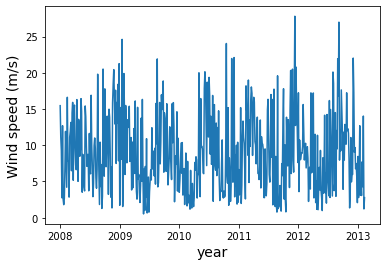

In [66]:
plt.plot(wind_speeds_for_plot[::24*5])
plt.xlabel('year',fontsize=14)
plt.ylabel('Wind speed (m/s)',fontsize=14)
#plt.gca().set_xticks(ticks=np.arange(0,len(wind_speeds_for_plot),73))
plt.gca().set_xticklabels(np.arange(2007,2015))
#plt.savefig('eda-wind-time.png',bbox_inches='tight')

In [92]:
year_idx = get_year_idx(2013)
#year_idx = 'all'
wind_speeds_list =  [get_speeds(loc_idx,year_idx) for loc_idx in nrel_idx_list]
mean_wind_speeds = [np.mean(wind_speeds) for wind_speeds in wind_speeds_list]
mean_cubed_wind_speeds = [np.mean(wind_speeds**3) for wind_speeds in wind_speeds_list]
select_df['mean_wind_speed'] = mean_wind_speeds
select_df['mean_cubed_wind_speed'] = mean_cubed_wind_speeds

In [95]:
def get_vals(dset,loc_idx,time_idxs):
    #print(type(time_idxs))
    if type(time_idxs) == str:
        if time_idxs == 'all':
            return dset[:, loc_idx[0], loc_idx[1]]
        if time_idxs == 'test':
            return dset[::100, loc_idx[0], loc_idx[1]]
    else:
        return dset[min(time_idxs):max(time_idxs)+1, loc_idx[0], loc_idx[1]]
def get_vals_at(dset,loc_idx_list,time_idxs):
    return [get_vals(dset,loc_idx,time_idxs) for loc_idx in loc_idx_list]

In [122]:
# year_idx = get_year_idx(2013)
# mean_temps,mean_pressures, mean_wind_dir, mean_precip = [
#     list(map(np.mean,get_vals_at(f[dset_name],nrel_idx_list,year_idx)))
#     for dset_name in ['temperature_80m','pressure_100m','winddirection_80m','precipitationrate_0m']
# ]
select_df['temperature'] = mean_temps
select_df['pressure'] = mean_pressures
select_df['wind_dir'] = mean_wind_dir
select_df['precipitation'] = mean_precip

In [106]:
year_idx = get_year_idx(2013)
#year_idx = 'all'
wind_speeds_list =  [get_speeds(loc_idx,year_idx) for loc_idx in nrel_idx_list]
mean_wind_speeds = [np.mean(wind_speeds) for wind_speeds in wind_speeds_list]
mean_cubed_wind_speeds = [np.mean(wind_speeds**3) for wind_speeds in wind_speeds_list]
select_df['mean_wind_speed'] = mean_wind_speeds
select_df['mean_cubed_wind_speed'] = mean_cubed_wind_speeds

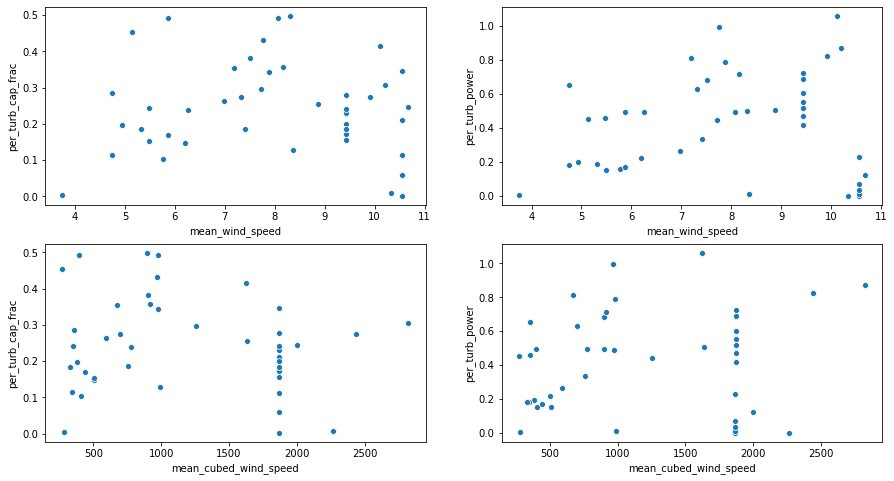

In [107]:
fig, axes = plt.subplots(2,2,figsize=(15,8))
sns.scatterplot(data=select_df,x='mean_wind_speed',y='per_turb_cap_frac',ax = axes[0,0]);
sns.scatterplot(data=select_df,x='mean_wind_speed',y='per_turb_power', ax = axes[0,1])
#axes[0,1].set_ylim(0,1)
#axes[1,1].set_ylim(0,1)
sns.scatterplot(data=select_df,x='mean_cubed_wind_speed',y='per_turb_cap_frac', ax = axes[1,0]); 
sns.scatterplot(data=select_df,x='mean_cubed_wind_speed',y='per_turb_power', ax = axes[1,1])

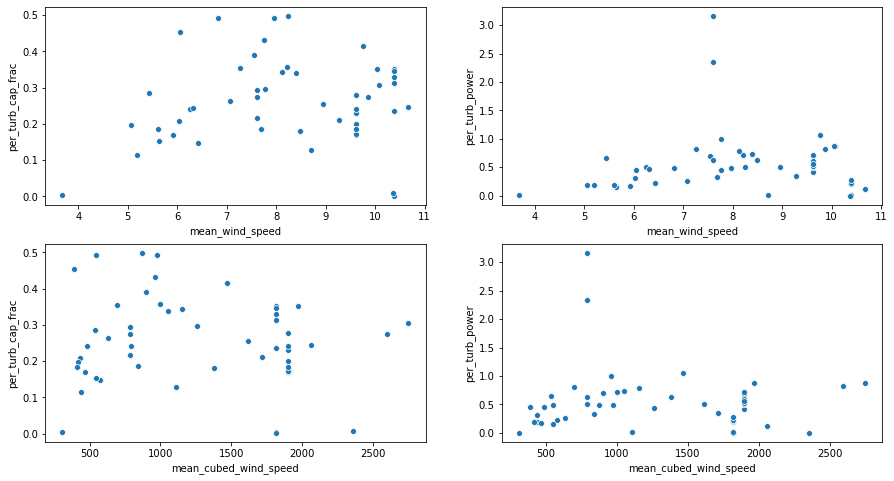

In [428]:
#np.save('data/farm_wind_speeds_060320ff.npy',np.array(wind_speeds_list))
#np.save('data/farm_name_wind_speeds_063020ff.npy',select_df['Plant Name'])

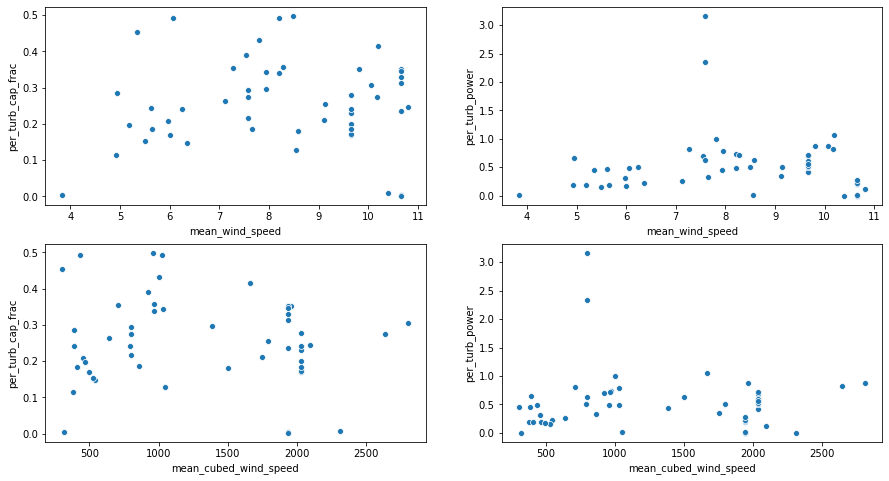

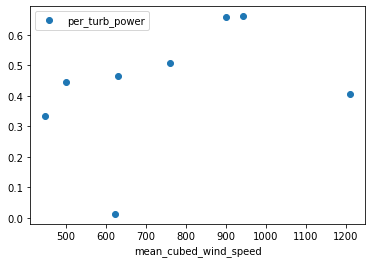

In [198]:
#select_df['mean_wind_speed'] = mean_wind_speeds
select_df['mean_cubed_wind_speed'] = mean_cubed_wind_speeds
select_df['per_turb_power'] = select_df['mean MW']/select_df['n_turbines']
select_df.plot(x='mean_cubed_wind_speed',y='per_turb_power',linestyle='',marker='o')

In [126]:
#fselect_df.to_pickle('data/select-wind-power-0607.pkl',protocol=3)

## append additional info

In [102]:
loaded_df = pd.read_pickle('data/select-wind-power-0608.pkl')

# year_idx = get_year_idx(2013)
# mo_length, humidity, DNI = [
#     list(map(np.mean,get_vals_at(f[dset_name],nrel_idx_list,year_idx)))
#     for dset_name in ['inversemoninobukhovlength_2m','relativehumidity_2m','DNI']
# ]

loaded_df['mo_length'] = mo_length
loaded_df['humidity'] = humidity
loaded_df['DNI'] = DNI

In [103]:
#floaded_df.to_pickle('data/select-wind-power-0608-2.pkl',protocol = 3)

In [104]:
wind_speeds = np.array(get_vals_at(f['windspeed_80m'],nrel_idx_list,'all'))

In [105]:
#fnp.save('data/farm_all_windspeed_80m_0607.npy',wind_speeds)

# mean rotor area

In [368]:
#t_rsa = swept area

Index(['index', 'case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 'eia_id',
       't_state', 't_county', 't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap',
       't_manu', 't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh',
       't_conf_atr', 't_conf_loc', 't_img_date', 't_img_srce', 'xlong',
       'ylat'],
      dtype='object')

In [68]:
select_turb_df[select_turb_df.p_name == 'Mountain View Power Partners I & II']['t_rsa']

1480    1590.43
1481    1590.43
1482    1590.43
1483    1590.43
1484    1590.43
         ...   
1691    1590.43
1692    1590.43
1693    1590.43
1694    1590.43
1695    1590.43
Name: t_rsa, Length: 432, dtype: float64

In [377]:
len(select_turb_df['p_name'].unique())

50

In [25]:
select_turb_df[select_turb_df.p_name == '251 Wind']['t_rsa']

1988   NaN
1989   NaN
1990   NaN
1991   NaN
1992   NaN
        ..
2143   NaN
2144   NaN
2145   NaN
2146   NaN
2147   NaN
Name: t_rsa, Length: 160, dtype: float64

In [35]:
#there are significant diffrences in rotor area, and not much variance within-farm
area_stats = select_turb_df.groupby('p_name').agg({'t_rsa' : ['mean','std']})
#area_stats['Plant Name'] = 

## append area info to existing df, don't drop nans

In [69]:
len(area_stats[('t_rsa','mean')])

42

In [ ]:
pd.concat([match_df[match_df['GEN'] == name] for name in loaded_df['Plant Name']],axis=0)

In [74]:
pd.concat([match_df[match_df['GEN'] == name] for name in loaded_df['Plant Name']],axis=0)

,GEN,FARM,TURB
0,Alta I Wind Energy Center,Alta I,Alta I
1,Alta II Wind Energy Center,Alta II (Vestas),Alta II
2,Alta III Wind Energy Center,Alta III,Alta III
3,Alta IV Wind Energy Center,Alta IV,Alta IV
4,Alta V Wind Energy Center,Alta V,Alta V
6,Alta X Wind Energy Center,Alta X,Alta X
8,Anheuser-Busch,Anheuser-Busch Fairfield,Anheuser-Busch Fairfield
9,Buena Vista Energy LLC,Buena Vista Wind Farm Repower,Buena Vista
10,Cemex BMQ,Cemex Black Mountain Quarry,Cemex Black Mountain Quarry
11,Cemex Madison,Cemex Madison,Cemex Madison


In [ ]:
area_stats[area_stats.p_name = name][('t_rsa','mean')] for name in loaded_df['']

In [78]:
area_stats[('t_rsa','mean')].to_numpy()

array([           nan,  4656.63      ,  6361.73      ,  6361.73      ,
        6361.73      ,  6361.73      ,  8332.29      ,  5001.125     ,
        2960.92      ,  4656.63      ,  4656.63      ,  5345.62      ,
        5345.62      ,            nan,            nan,  1256.64      ,
        5345.62      ,  7853.98      , 10568.32      ,  6792.91      ,
        5026.55      ,  2960.92      ,  5944.68      ,  4656.63      ,
         183.85      ,  6792.91      ,  1590.43      ,  1734.94      ,
        6361.73      ,  5345.62      ,  6720.06      ,  6361.73      ,
        5345.62      ,  2960.92      ,  5345.62      ,  2960.92      ,
        5345.62      ,  8992.02      ,  8011.85      ,  6361.73      ,
        4656.63      ,  5378.49983333])

In [84]:
area_stats.index

Index(['251 Wind', 'Alta I', 'Alta II', 'Alta III', 'Alta IV', 'Alta V',
       'Alta X', 'Anheuser-Busch Fairfield', 'Buena Vista',
       'Cemex Black Mountain Quarry', 'Cemex Madison', 'Cemex River Plant',
       'City of Soledad Water Reclamation Facility', 'Difwind 2', 'Difwind 5',
       'Garnet Wind Project', 'Golden Acorn Casino', 'Golden Hills',
       'Golden Hills North', 'Hatchett Ridge', 'High Winds',
       'Inland Empire Utility Agency', 'Kumeyaay Phase I', 'Manzana Winds',
       'Mesa Wind Farm', 'Montezuma Winds II',
       'Mountain View Power Partners I & II',
       'Mountain View Power Partners III', 'Mustang Hills', 'Nestle Waters',
       'Pacific Wind', 'Pinyon Pines II', 'Robertsons Ready Mix',
       'Safeway Tracy', 'Scheid Vineyards', 'Superior Farms', 'Taylor Farms',
       'Tule', 'Vasco (repower)', 'Wagner', 'Walmart Red Bluff', 'Windstar'],
      dtype='object', name='p_name')

In [86]:
####HACK
rsa_list = np.array([           np.nan,  4656.63      ,  6361.73      ,  6361.73      ,
        6361.73      ,  6361.73      ,  8332.29      ,  5001.125     ,
        2960.92      ,  4656.63      ,  4656.63      ,  5345.62      ,
        5345.62      ,           np.nan,            np.nan,  1256.64      ,
        5345.62      ,  7853.98      , 10568.32      ,  6792.91      ,
        5026.55      ,  2960.92      ,  5944.68      ,  4656.63      ,
         183.85      ,  6792.91      ,  1590.43, 1590.43      ,  1734.94      ,
        6361.73      ,  5345.62      ,  6720.06      ,  6361.73      ,
        5345.62      ,  2960.92      ,  5345.62      ,  2960.92      ,
        5345.62      ,  8992.02      ,  8011.85      ,  6361.73      ,
        4656.63      ,  5378.49983333])
name_list = np.array(['251 Wind', 'Alta I', 'Alta II', 'Alta III', 'Alta IV', 'Alta V',
       'Alta X', 'Anheuser-Busch Fairfield', 'Buena Vista',
       'Cemex Black Mountain Quarry', 'Cemex Madison', 'Cemex River Plant',
       'City of Soledad Water Reclamation Facility', 'Difwind 2', 'Difwind 5',
       'Garnet Wind Project', 'Golden Acorn Casino', 'Golden Hills',
       'Golden Hills North', 'Hatchett Ridge', 'High Winds',
       'Inland Empire Utility Agency', 'Kumeyaay Phase I', 'Manzana Winds',
       'Mesa Wind Farm', 'Montezuma Winds II',
       'Mountain View Power Partners I & II','Mountain View Power Partners I & II',
       'Mountain View Power Partners III', 'Mustang Hills', 'Nestle Waters',
       'Pacific Wind', 'Pinyon Pines II', 'Robertsons Ready Mix',
       'Safeway Tracy', 'Scheid Vineyards', 'Superior Farms', 'Taylor Farms',
       'Tule', 'Vasco (repower)', 'Wagner', 'Walmart Red Bluff', 'Windstar'])
print(len(rsa_list),len(name_list))

43 43


In [88]:
loaded_df = pd.read_pickle('data/select-wind-power-0608.pkl')
#loaded_df['rsa'] = area_stats[('t_rsa','mean')].to_numpy()
loaded_df['rsa'] = rsa_list
loaded_df['p_name'] = name_list
loaded_df[['Plant Name','p_name']]
#floaded_df.to_pickle('data/select-wind-power-0608.pkl')

,Plant Name,p_name
0,Alta I Wind Energy Center,251 Wind
1,Alta II Wind Energy Center,Alta I
2,Alta III Wind Energy Center,Alta II
3,Alta IV Wind Energy Center,Alta III
4,Alta V Wind Energy Center,Alta IV
6,Alta X Wind Energy Center,Alta V
8,Anheuser-Busch,Alta X
9,Buena Vista Energy LLC,Anheuser-Busch Fairfield
10,Cemex BMQ,Buena Vista
11,Cemex Madison,Cemex Black Mountain Quarry


In [73]:
len(loaded_df)

43

In [415]:
#select_df['mean area'] =area_stats[('t_rsa','mean')]
len(area_stats[('t_rsa','mean')])

50

In [419]:
len(select_turb_df['p_name'].unique())

50

In [416]:
len(select_df)

51

# include elevation data

In [123]:
import requests
import os

In [124]:
#stolen from https://gist.github.com/Alliages/a858a59b2487d81eb66c0c3b62d042be

def calc_elevation(lat, lng):
    apikey = os.environ["GOOGLE_API_KEY"]
    url = "https://maps.googleapis.com/maps/api/elevation/json"
    request = requests.get(url+"?locations="+str(lat)+","+str(lng)+"&key="+apikey)
    try:
        results = request.json().get('results')
        if 0 < len(results):
            elevation = results[0].get('elevation')
            # ELEVATION
            return elevation
        else:
            print('HTTP GET Request failed.')
    except ValueError:
        print('JSON decode failed: '+str(request))
        
#test 
#elevation(35.0192,-118.3031)

In [125]:
#compute elevation for each farm
select_df['elevation'] = select_df.apply(lambda row: calc_elevation(row['latitude'], row['longitude']),axis=1)

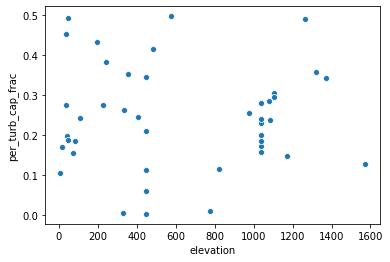

In [102]:
sns.scatterplot(data=select_df,x='elevation',y='per_turb_cap_frac'); plt.show()

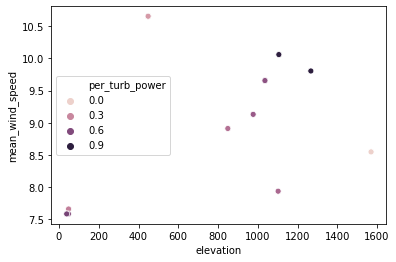

In [218]:
#some overlapping points here
sns.scatterplot(data=select_df,x='elevation',y='mean_wind_speed',hue='per_turb_power'); plt.show()

In [263]:
select_turb_df['p_name'].unique()

array(['251 Wind', 'Alta I', 'Alta II', 'Alta III', 'Alta IV', 'Alta V',
       'Alta X', 'Edom Hills (repower)', 'Coram Energy LLC', 'Windstar',
       'Pinyon Pines I', 'Pinyon Pines II', 'Manzana Winds', 'High Winds',
       'Shiloh II', 'Montezuma Winds II',
       'Mountain View Power Partners I & II',
       'Mountain View Power Partners III', 'Mountain View IV'],
      dtype=object)

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 'eia_id', 't_state',
       't_county', 't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu',
       't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_conf_atr',
       't_conf_loc', 't_img_date', 't_img_srce', 'xlong', 'ylat'],
      dtype='object')


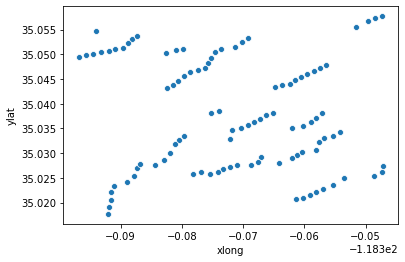

In [264]:
test_farm = ca_turb_df[ca_turb_df.p_name == 'Alta I']
print(test_farm.columns)
sns.scatterplot(data=test_farm,x = 'xlong',y='ylat')

We find that across the wind 251 wind farm, we have only 2 NREL geospatial points. Let's see how correlated these points are across time. Is it worth separating them out?

For Alta I, there are 9 unique points

In [265]:
test_idx_list = test_farm.apply(lambda row: indicesForCoord(f, row['ylat'], row['xlong']),axis=1)

In [271]:
unique_idx = test_idx_list.unique()
print(len(unique_idx))

9


In [267]:
test = np.array([get_speeds(loc_idx,get_year_idx(year)) for loc_idx in unique_idx])

probably not:

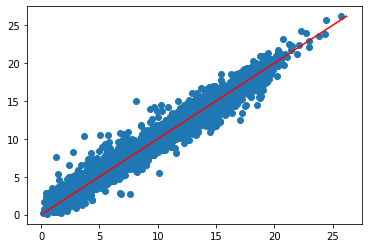

In [268]:
plt.scatter(test[0],test[1])
plt.plot([np.min(test[1]),np.max(test[1])],[np.min(test[1]),np.max(test[1])],c='red')

# comparing names

In [286]:
[len(x.unique()) for x in [gen_df['Plant Name'],farm_df['Facility Name']]]

[117, 166]

In [292]:
import itertools
name_match = pd.DataFrame(itertools.zip_longest(
    gen_df.sort_values('Plant Name')['Plant Name'].unique(),
    farm_df['Facility Name'].unique(),
    ca_turb_df['p_name'].unique(),fillvalue='-'))
#name_match.to_csv('name_match.csv')

In [176]:
gen_df[vec_str_in(gen_df['Plant Name'],'II')].sort_values('Gross MWh',ascending=False)
#gen_df.sort_values('Gross MWh',ascending=False).iloc[:20]

,Year,Company Name,EIA\nPlant ID,CEC\nPlant ID,Plant Name,State,Capacity (MW),Gross MWh,Net MWh
51,2019.0,Not Available,61582,W0471,"Voyager Wind II, LLC",CA,128.7,461824,461824
101,2019.0,Shiloh III Wind Project,56874,W0384,"Shiloh Wind Project 2, LLC (Shiloh II & III)",CA,153.8,383508,383508
108,2019.0,Terra-Gen Operating Company,57292,W0387,Alta III Wind Energy Center,CA,150.0,316458,316458
107,2019.0,Terra-Gen Operating Company,57291,W0372,Alta II Wind Energy Center,CA,150.0,301923,301923
80,2019.0,See WPRS for details,59236,W0438,Rising Tree Wind Farm III,CA,99.0,266475,266475
75,2019.0,See WPRS for details,Missing,W0421,"Shiloh III Wind Project, LLC",CA,102.5,266081,266081
0,2019.0,Alta Wind VIII LLC,57835,W0393,"Alta Wind VIII, LLC",CA,150.0,237116,237116
113,2019.0,Terra-Gen Operating Company,57837,W0416,Pinyon Pines Winds II,CA,132.0,213748,213748
33,2019.0,NextEra Energy Resources LLC,57701,W0392,Montezuma Wind II,CA,78.2,188201,188201
52,2019.0,Not Available,61583,W0472,"Voyager Wind III, LLC",CA,43.2,136137,136137


In [153]:
farm_df[vec_str_in(farm_df['Facility Name'],'Pinyon')]

,index,Facility Name,Facility,FacilityType,Owner,Developer,EnergyPurchaser,Place,GeneratingCapacity,NumberOfUnits,CommercialOnlineDate,WindTurbineManufacturer,FacilityStatus,Coordinates,latitude,longitude
89,1123,Pinyon Pines I,Pinyon Pines I (Alta VII),Commercial Scale Wind,MidAmerican Energy,Terra-Gen Power LLC,Southern California Edison Co,Tehachapi Pass CA,168 MW,56.0,2012.0,Vestas,In Service,"35.0192°, -118.3031°",35.0192,-118.3031
90,1124,Pinyon Pines II,Pinyon Pines II (Alta IX),Commercial Scale Wind,MidAmerican Energy,Terra-Gen Power LLC,Southern California Edison Co,Tehachapi Pass CA,132 MW,44.0,2012.0,Vestas,In Service,"35.0192°, -118.3031°",35.0192,-118.3031


In [160]:
gen_df.iloc[:50]

,Year,Company Name,EIA\nPlant ID,CEC\nPlant ID,Plant Name,State,Capacity (MW),Gross MWh,Net MWh
0,2019.0,Alta Wind VIII LLC,57835,W0393,"Alta Wind VIII, LLC",CA,150.0,237116,237116
1,2019.0,BP Wind Energy North America,50553,W0391,"Edom Hills Project 1, LLC",CA,20.0,28500,28500
2,2019.0,CalWind Resources Inc,10191,W0284,Wind Resource I (Calwind Wind Resource I),CA,8.7,14038,14038
3,2019.0,CalWind Resources Inc,54909,W0320,Wind Resource II (Calwind),CA,20.0,47619,47619
4,2019.0,Coram California Development LP,57962,W0408,"Coram California Development, LP",CA,102.0,247038,247038
5,2019.0,Difwinds Farm Ltd V,54685,W0386,Difwind Farms LTD V,CA,3.1,6423,6423
6,2019.0,EUI Management PH Inc,10027,W0268,Windparks Unlimited 1 and 2,CA,25.2,37749,37749
7,2019.0,EverPower Wind Holdings Inc,57833,W0406,Mustang Hills LLC (Alta Wind VI Energy Center),CA,150.0,264160,264160
8,2019.0,Foundation Windpower,57594,W0395,Teichert Vernalis,CA,1.5,2006,2006
9,2019.0,Foundation Windpower,57626,W0396,Safeway Tracy,CA,2.0,2694,2694
